In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv(r'onlinefraud.csv')
payment_data= data.copy()

In [3]:
payment_data.value_counts()

step  type      amount      nameOrig     oldbalanceOrg  newbalanceOrig  nameDest     oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud
1     CASH_IN   270.78      C619985571   4184966.65     4185237.43      C875917495   3019.00         0.00            0        0                 1
306   CASH_OUT  220427.13   C1029846599  0.00           0.00            C129321077   882543.64       1102970.77      0        0                 1
                221047.89   C644407995   13756.00       0.00            C1396283314  9082.00         0.00            0        0                 1
                221009.03   C74685400    102768.00      0.00            C1714223283  767644.73       988653.76       0        0                 1
                220986.46   C540058568   9141.00        0.00            C1344091292  0.00            220986.46       0        0                 1
                                                                                                                                 

In [4]:
payment_data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
# Check null values 
payment_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There are no missing values in the dataset.

## Feature Scaling

### Normalization

In [6]:

columns_to_drop =['type', 'nameOrig', 'nameDest', 'isFraud', 'isFlaggedFraud']
selected_data= payment_data.drop(columns=columns_to_drop)
selected_data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,9839.64,170136.00,160296.36,0.00,0.00
1,1,1864.28,21249.00,19384.72,0.00,0.00
2,1,181.00,181.00,0.00,0.00,0.00
3,1,181.00,181.00,0.00,21182.00,0.00
4,1,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,743,850002.52,850002.52,0.00,0.00,0.00


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_data)
# Creating a DataFrame from the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=selected_data.columns)

print(scaled_df)


         step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0         0.0  0.000106       0.002855        0.003233        0.000000   
1         0.0  0.000020       0.000357        0.000391        0.000000   
2         0.0  0.000002       0.000003        0.000000        0.000000   
3         0.0  0.000002       0.000003        0.000000        0.000059   
4         0.0  0.000126       0.000697        0.000603        0.000000   
...       ...       ...            ...             ...             ...   
6362615   1.0  0.003674       0.005701        0.000000        0.000000   
6362616   1.0  0.068272       0.105923        0.000000        0.000000   
6362617   1.0  0.068272       0.105923        0.000000        0.000192   
6362618   1.0  0.009195       0.014265        0.000000        0.000000   
6362619   1.0  0.009195       0.014265        0.000000        0.018286   

         newbalanceDest  
0              0.000000  
1              0.000000  
2              0.000000  
3      

In [8]:
import pandas as pd

# Assuming scaled_df and payment_data are your DataFrames
# merge_cols is the list of columns from payment_data that you want to merge
merge_cols = ["type", "isFraud"]

# Merge scaled_df with the selected columns from payment_data
merged_data = scaled_df.merge(payment_data[merge_cols], left_index=True, right_index=True)

# Display the merged DataFrame
print(merged_data)


         step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0         0.0  0.000106       0.002855        0.003233        0.000000   
1         0.0  0.000020       0.000357        0.000391        0.000000   
2         0.0  0.000002       0.000003        0.000000        0.000000   
3         0.0  0.000002       0.000003        0.000000        0.000059   
4         0.0  0.000126       0.000697        0.000603        0.000000   
...       ...       ...            ...             ...             ...   
6362615   1.0  0.003674       0.005701        0.000000        0.000000   
6362616   1.0  0.068272       0.105923        0.000000        0.000000   
6362617   1.0  0.068272       0.105923        0.000000        0.000192   
6362618   1.0  0.009195       0.014265        0.000000        0.000000   
6362619   1.0  0.009195       0.014265        0.000000        0.018286   

         newbalanceDest      type  isFraud  
0              0.000000   PAYMENT        0  
1              0.0000

In [9]:
merged_data.isnull().sum()

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
type              0
isFraud           0
dtype: int64

<Axes: >

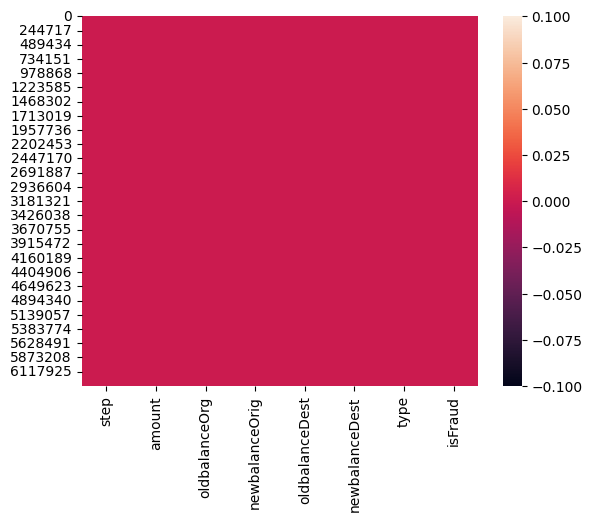

In [10]:
sns.heatmap(merged_data.isnull())

### Handling Categorical Variable

In [11]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

typ = ohe.fit_transform(merged_data[['type']]).toarray()
df_1 = pd.DataFrame(typ,columns= ohe.categories_)

merged_data= merged_data.drop("type", axis=1)
handled_category_data = pd.concat([merged_data,df_1], axis= 1)
handled_category_data.head(5)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,"(CASH_IN,)","(CASH_OUT,)","(DEBIT,)","(PAYMENT,)","(TRANSFER,)"
0,0.0,0.000106,0.002855,0.003233,0.000000,0.0,0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.000020,0.000357,0.000391,0.000000,0.0,0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.000002,0.000003,0.000000,0.000000,0.0,1,0.0,0.0,0.0,0.0,1.0
3,0.0,0.000002,0.000003,0.000000,0.000059,0.0,1,0.0,1.0,0.0,0.0,0.0
4,0.0,0.000126,0.000697,0.000603,0.000000,0.0,0,0.0,0.0,0.0,1.0,0.0


In [12]:


# Assuming your DataFrame is named df
# Replace df with the actual name of your DataFrame if it's different
handled_category_data.rename(columns={
    ('CASH_IN',): 'CASH_IN',
    ('CASH_OUT',): 'CASH_OUT',
    ('DEBIT',): 'DEBIT',
    ('PAYMENT',): 'PAYMENT',
    ('TRANSFER',): 'TRANSFER'
}, inplace=True)

# Now the specified columns are renamed
print(handled_category_data.columns)

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT',
       'TRANSFER'],
      dtype='object')


In [13]:
handled_category_data['TRANSFER'].value_counts()

TRANSFER
0.0    5829711
1.0     532909
Name: count, dtype: int64

In [14]:
handled_category_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            float64
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   CASH_IN         float64
 8   CASH_OUT        float64
 9   DEBIT           float64
 10  PAYMENT         float64
 11  TRANSFER        float64
dtypes: float64(11), int64(1)
memory usage: 582.5 MB


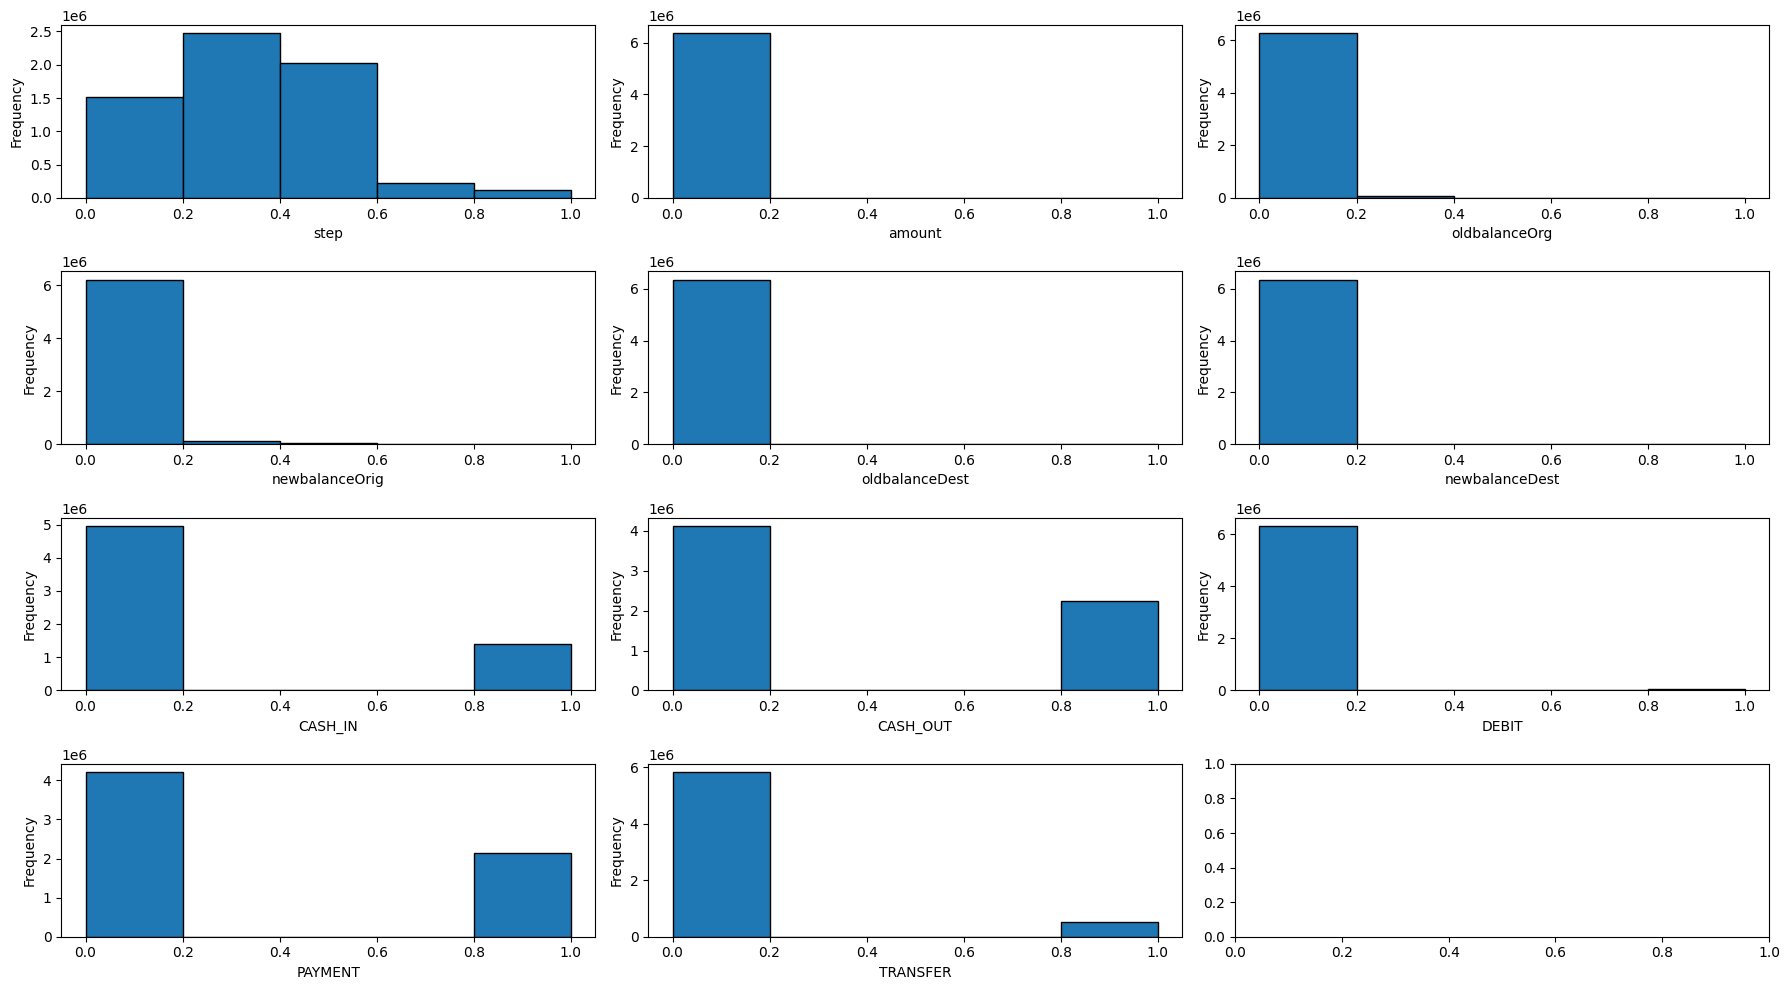

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

feature = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest','CASH_IN','CASH_OUT','DEBIT','PAYMENT','TRANSFER']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 10))  # Creating a 2x3 grid for subplots

for i, ax in zip(feature, axes.flatten()):

        handled_category_data[i].plot(kind='hist', bins=5, edgecolor='black', ax=ax)
        ax.set_xlabel(i)
   

plt.tight_layout()  # Adjusts subplot parameters to give specified padding
plt.show()


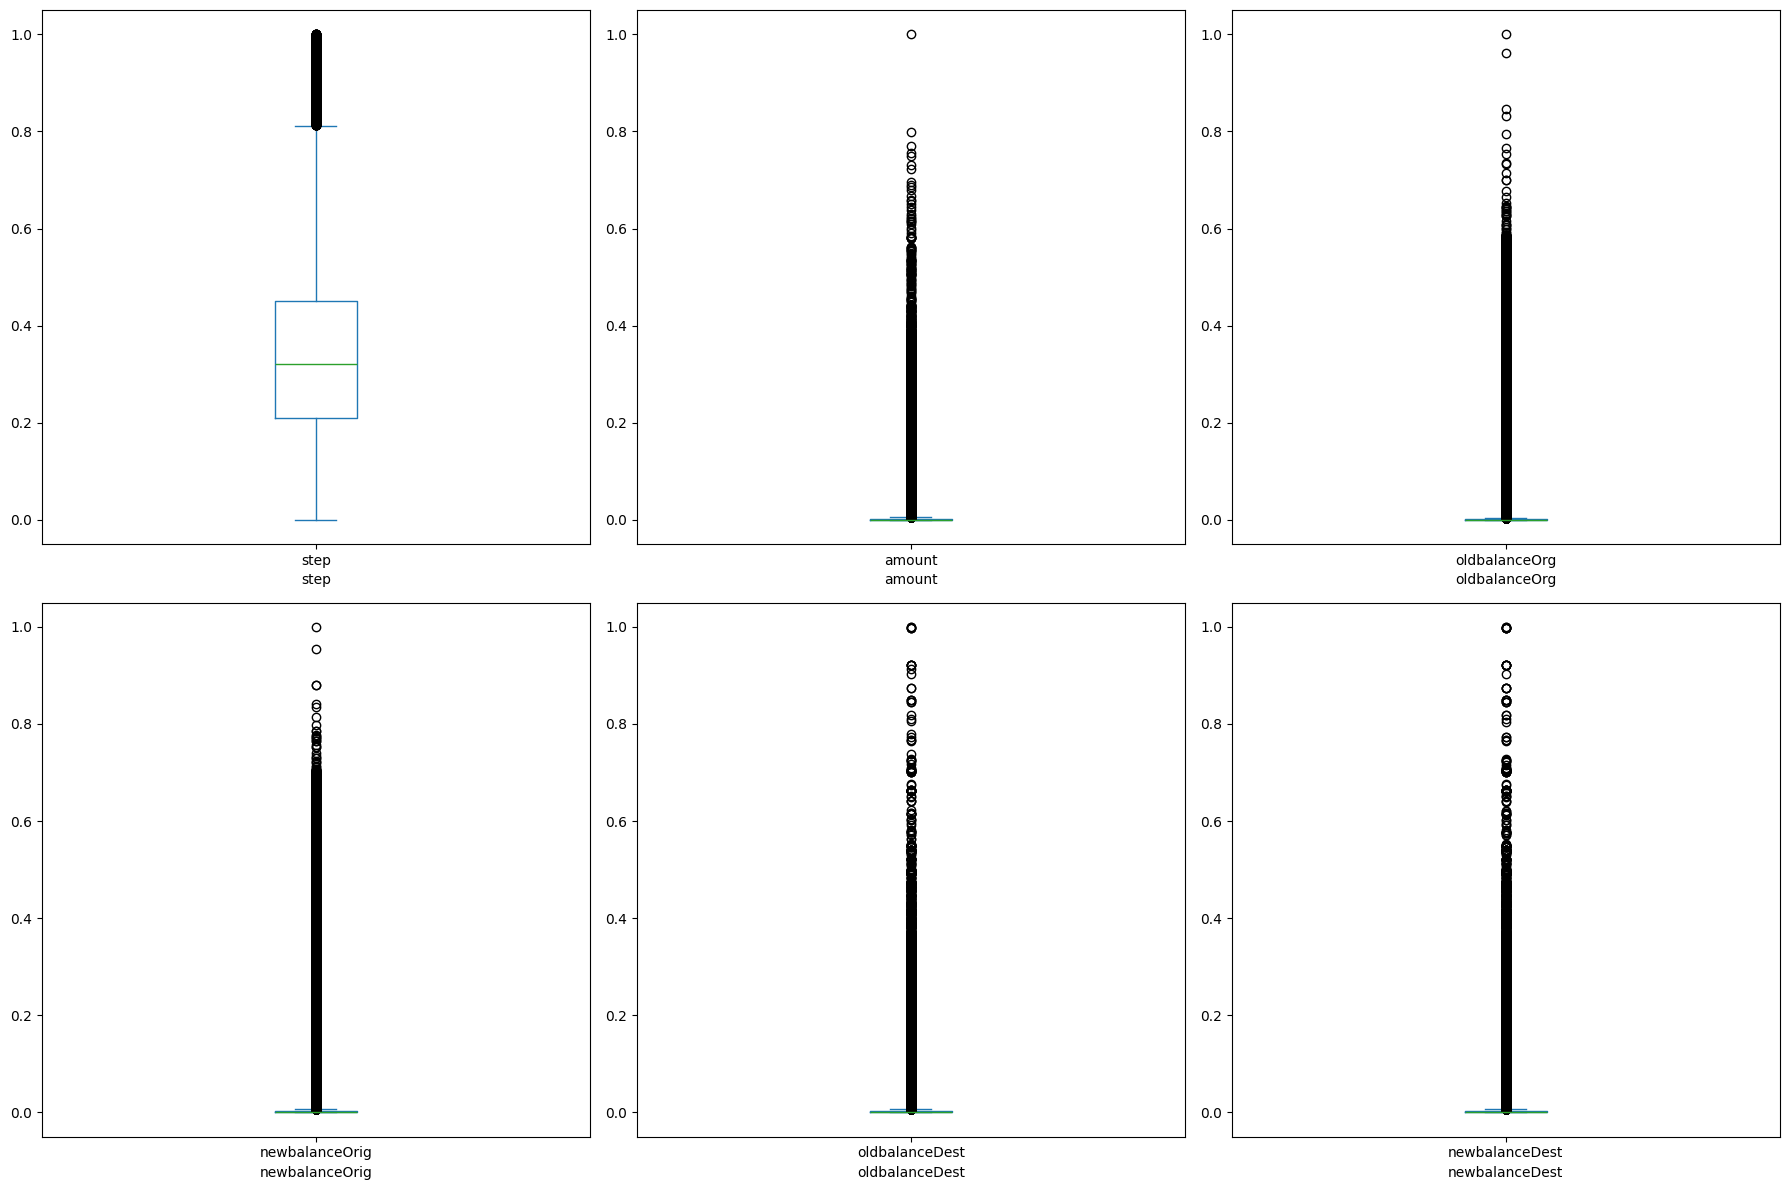

In [16]:
import matplotlib.pyplot as plt

feature = ['step','amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

plt.figure(figsize=(18, 12))

for i, feat in enumerate(feature, 1):
    plt.subplot(2, 3, i)
    plt.xlabel(feat)
    handled_category_data[feat].plot(kind='box')
    plt.tight_layout()

plt.show()


We could see some outliers in the plots. 

In [17]:
# Assuming 'handled_category_data' is your DataFrame and 'features' is the list of features
features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Select only the specified features from the DataFrame
selected_features_data = handled_category_data[features]

# Calculate quartiles and IQR for each selected feature
Q1 = selected_features_data.quantile(0.25)
Q3 = selected_features_data.quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5

# Identify and remove outliers
outliers_mask = ((selected_features_data < (Q1 - threshold * IQR)) | (selected_features_data > (Q3 + threshold * IQR))).any(axis=1)
final_data = handled_category_data[~outliers_mask]

# 'final_data' now contains the original data without outliers in the specified features


In [18]:
sns.heatmap(final_data.isnull())

In [19]:
final_data['CASH_IN'].value_counts() #4123893

CASH_IN
0.0    3917684
1.0     404209
Name: count, dtype: int64

In [20]:
final_data['oldbalanceOrg'].info()

<class 'pandas.core.series.Series'>
Index: 4321893 entries, 0 to 6259931
Series name: oldbalanceOrg
Non-Null Count    Dtype  
--------------    -----  
4321893 non-null  float64
dtypes: float64(1)
memory usage: 65.9 MB


In [21]:
final_data['step'].info()

<class 'pandas.core.series.Series'>
Index: 4321893 entries, 0 to 6259931
Series name: step
Non-Null Count    Dtype  
--------------    -----  
4321893 non-null  float64
dtypes: float64(1)
memory usage: 65.9 MB


In [22]:
final_data['isFraud'].info()

<class 'pandas.core.series.Series'>
Index: 4321893 entries, 0 to 6259931
Series name: isFraud
Non-Null Count    Dtype
--------------    -----
4321893 non-null  int64
dtypes: int64(1)
memory usage: 65.9 MB


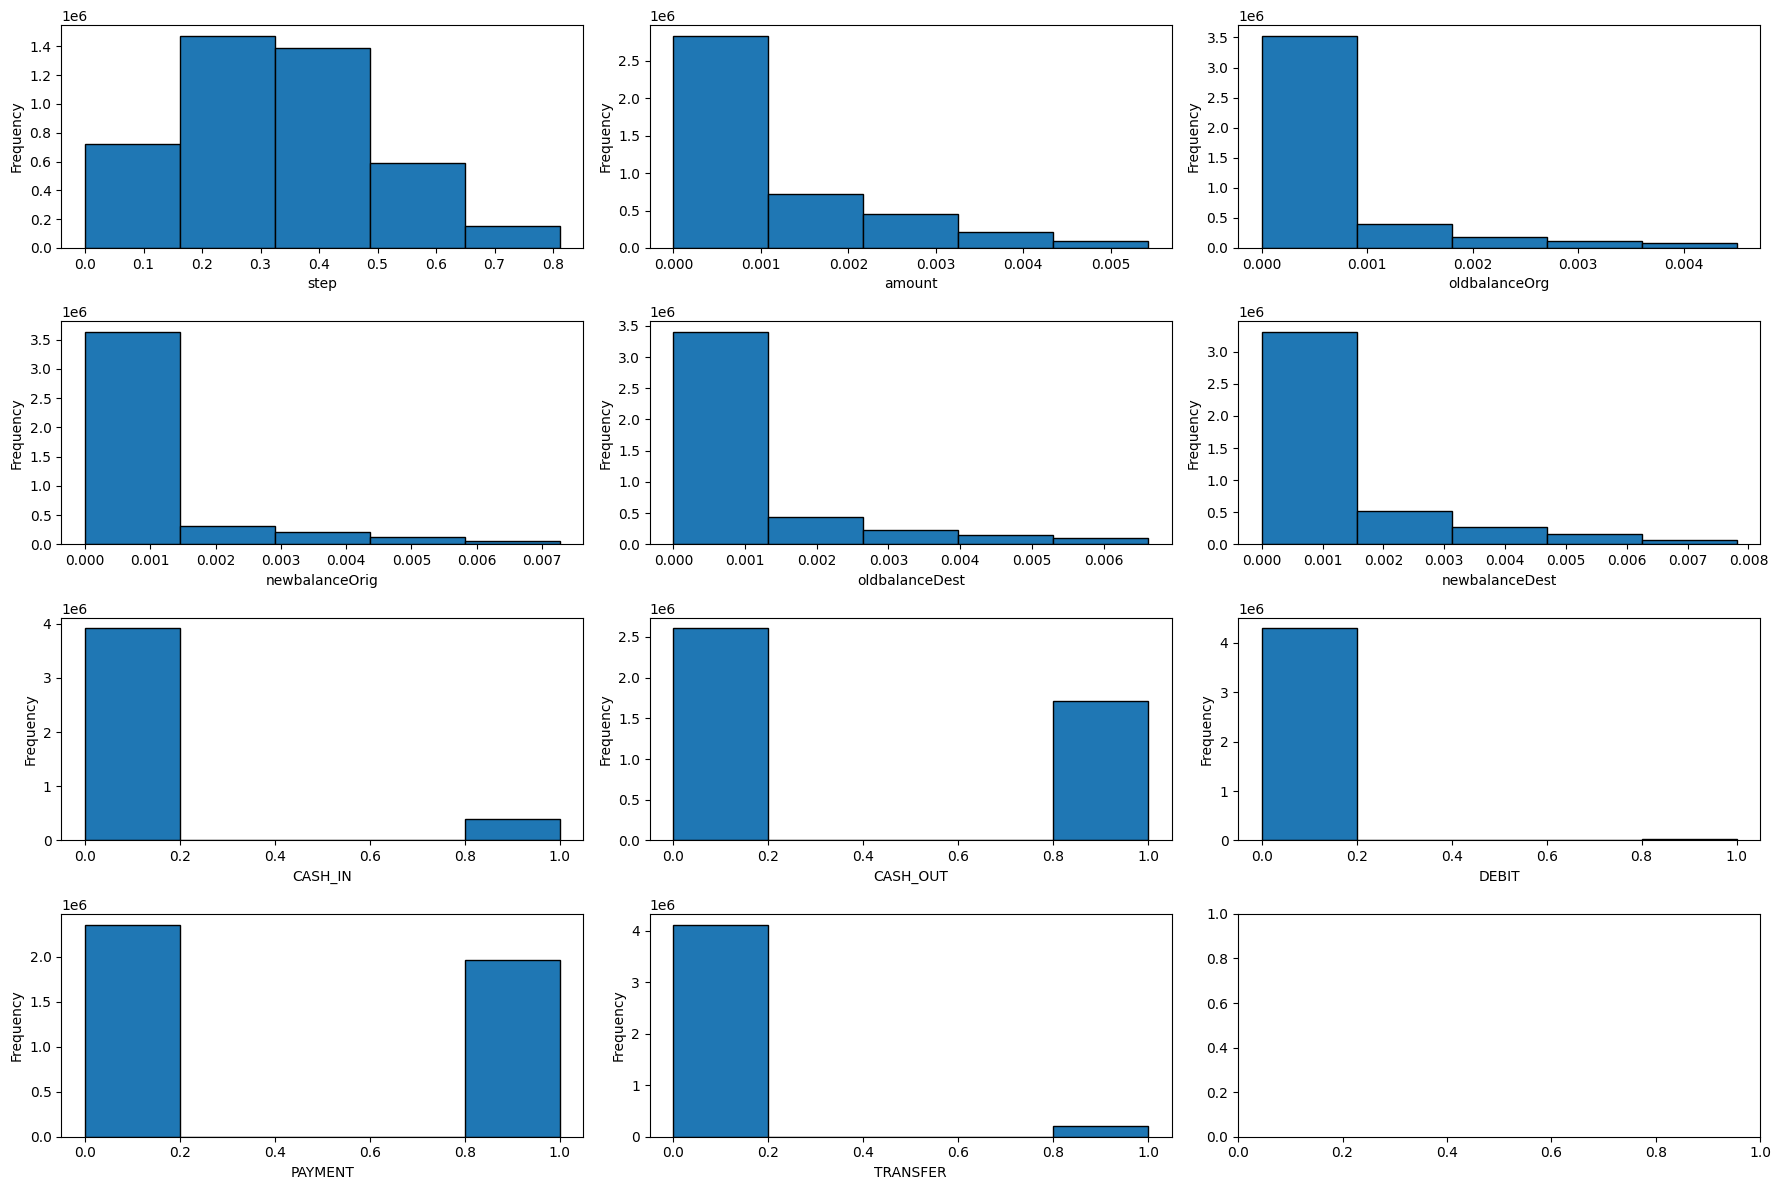

In [23]:
feature = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest','CASH_IN','CASH_OUT','DEBIT','PAYMENT','TRANSFER']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 12))  # Creating a 2x3 grid for subplots

for i, ax in zip(feature, axes.flatten()):
    final_data[i].plot(kind='hist', bins=5, edgecolor='black', ax=ax)
    ax.set_xlabel(i)

plt.tight_layout()  # Adjusts subplot parameters to give specified padding
plt.show()

In [24]:
final_data.isnull().sum()
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4321893 entries, 0 to 6259931
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            float64
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   CASH_IN         float64
 8   CASH_OUT        float64
 9   DEBIT           float64
 10  PAYMENT         float64
 11  TRANSFER        float64
dtypes: float64(11), int64(1)
memory usage: 428.7 MB


Text(0.5, 1.0, 'Correlation Heatmap')

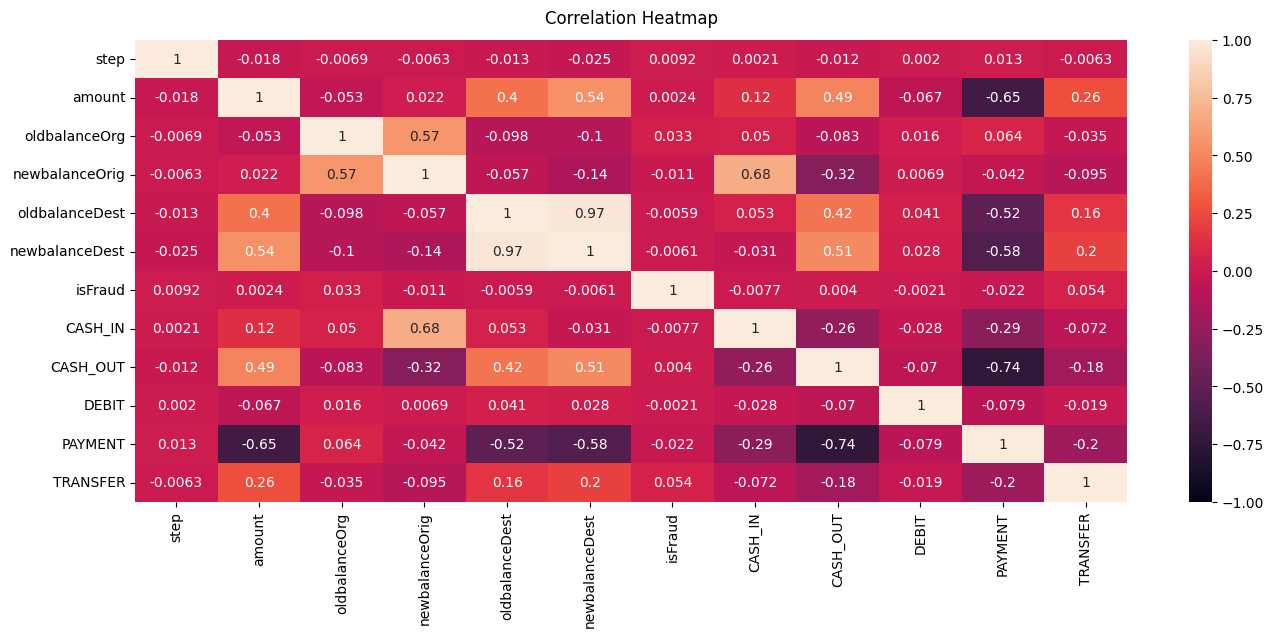

In [25]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(final_data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [26]:
final_data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0.000000,0.000106,0.002855,0.003233,0.000000,0.000000,0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.000020,0.000357,0.000391,0.000000,0.000000,0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.000002,0.000003,0.000000,0.000000,0.000000,1,0.0,0.0,0.0,0.0,1.0
3,0.000000,0.000002,0.000003,0.000000,0.000059,0.000000,1,0.0,1.0,0.0,0.0,0.0
4,0.000000,0.000126,0.000697,0.000603,0.000000,0.000000,0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6259911,0.808625,0.000045,0.000182,0.000134,0.000699,0.000711,0,0.0,0.0,1.0,0.0,0.0
6259916,0.809973,0.002512,0.003897,0.000000,0.000000,0.000000,1,0.0,0.0,0.0,0.0,1.0
6259924,0.811321,0.000425,0.000659,0.000000,0.000000,0.000000,1,0.0,0.0,0.0,0.0,1.0
6259930,0.811321,0.001719,0.002666,0.000000,0.000000,0.000000,1,0.0,0.0,0.0,0.0,1.0


In [27]:
final_data.corr().T

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
step,1.000000,-0.018044,-0.006918,-0.006341,-0.013145,-0.025438,0.009183,0.002082,-0.012384,0.002040,0.013292,-0.006302
amount,-0.018044,1.000000,-0.053416,0.022448,0.401512,0.539176,0.002448,0.123242,0.487011,-0.067426,-0.650183,0.260242
oldbalanceOrg,-0.006918,-0.053416,1.000000,0.565561,-0.097808,-0.101463,0.032821,0.050299,-0.082582,0.015947,0.063945,-0.035013
newbalanceOrig,-0.006341,0.022448,0.565561,1.000000,-0.056683,-0.142803,-0.011246,0.678501,-0.320854,0.006900,-0.042099,-0.094964
oldbalanceDest,-0.013145,0.401512,-0.097808,-0.056683,1.000000,0.969320,-0.005917,0.053036,0.418040,0.041346,-0.515218,0.155214
newbalanceDest,-0.025438,0.539176,-0.101463,-0.142803,0.969320,1.000000,-0.006120,-0.030953,0.512062,0.027796,-0.575868,0.201347
isFraud,0.009183,0.002448,0.032821,-0.011246,-0.005917,-0.006120,1.000000,-0.007708,0.003962,-0.002074,-0.021908,0.053539
CASH_IN,0.002082,0.123242,0.050299,0.678501,0.053036,-0.030953,-0.007708,1.000000,-0.260579,-0.027759,-0.293265,-0.071761
CASH_OUT,-0.012384,0.487011,-0.082582,-0.320854,0.418040,0.512062,0.003962,-0.260579,1.000000,-0.070107,-0.740667,-0.181238
DEBIT,0.002040,-0.067426,0.015947,0.006900,0.041346,0.027796,-0.002074,-0.027759,-0.070107,1.000000,-0.078901,-0.019307


In [28]:
cor = final_data.corr()
corr_data = abs(cor['isFraud'])
corr_features = corr_data[corr_data>0.01]
corr_features

oldbalanceOrg     0.032821
newbalanceOrig    0.011246
isFraud           1.000000
PAYMENT           0.021908
TRANSFER          0.053539
Name: isFraud, dtype: float64

In [29]:
#final_dataset= final_data.drop(['CASH_IN', 'DEBIT','TRANSFER'], axis=1)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
target_col = final_data['isFraud']
features_cols = final_data.drop('isFraud', axis=1)#[['oldbalanceOrg','newbalanceOrig','PAYMENT', 'TRANSFER']]


x_train, x_test, y_train, y_test = train_test_split(features_cols,target_col, test_size=0.2, random_state=1)


## Handle Imbalanced Dataset - SMOTE

<Axes: xlabel='isFraud'>

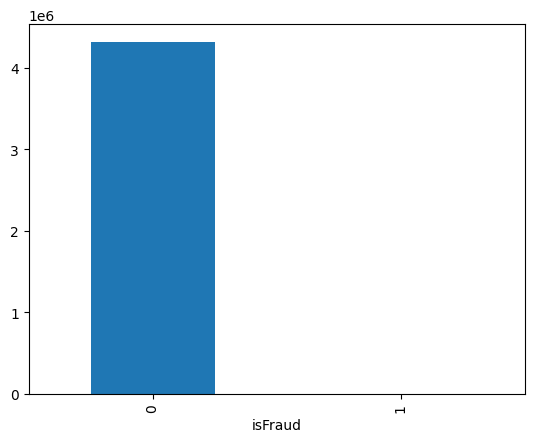

In [32]:
target_col.value_counts().plot(kind='bar')

In [33]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x_train,y_train)

print('Original dataset shape :', Counter(y_train))
print('Resample dataset shape :', Counter(y_smote))

Original dataset shape : Counter({0: 3455499, 1: 2015})
Resample dataset shape : Counter({0: 3455499, 1: 3455499})


## Logistic Regression Model

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
Logistic_classifier = LogisticRegression(random_state=0)
Logistic_classifier.fit(x_smote,y_smote)

d:\Sem 5\EE5235-Machine learning\ML project\Online_Payment_Fraud_detection MLproject\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [36]:
y_predict = Logistic_classifier.predict(x_test)

print(np.concatenate((y_predict.reshape(len(y_predict),1),y_test.to_numpy().reshape(len(y_test),1)),1))

[[1 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [38]:
logistic_matrix = confusion_matrix(y_test,y_predict)
print(logistic_matrix)

accuracy_score(y_test,y_predict)

[[724759 139148]
 [    24    448]]


0.8389919236816258

## SVM Model

In [39]:
from sklearn.svm import SVC

In [40]:
#svm_classifier = SVC( probability=True, random_state=0)
#svm_classifier.fit(x_smote,y_smote)

In [41]:
#y_predict_svm = svm_classifier.predict(x_test)
#print(np.concatenate((y_predict_svm.reshape(len(y_predict_svm),1),y_test.to_numpy().reshape(len(y_test),1)),1))

In [42]:
#svm_matrix = confusion_matrix(y_test,y_predict_svm)
#print(svm_matrix)

#accuracy_score(y_test,y_predict_svm)

In [ ]:
mean_hours = merged_data['step'].mean()
merged_data['step'].fillna(mean_hours,inplace=True)

mean_amount = merged_data['amount'].mean()
merged_data['amount'].fillna(mean_amount,inplace=True)

mean_oldbalanceOrg = merged_data['oldbalanceOrg'].mean()
merged_data['oldbalanceOrg'].fillna(mean_oldbalanceOrg,inplace=True)

mean_newbalanceOrig = merged_data['newbalanceOrig'].mean()
merged_data['newbalanceOrig'].fillna(mean_newbalanceOrig,inplace=True)

mean_oldbalanceDest = merged_data['oldbalanceDest'].mean()
merged_data['oldbalanceDest'].fillna(mean_oldbalanceDest,inplace=True)

mean_newbalanceDest = merged_data['newbalanceDest'].mean()
merged_data['newbalanceDest'].fillna(mean_newbalanceDest,inplace=True)

merged_data.info()
merged_data.isnull().sum()